# PREDICCIÓN DE LA PRODUCCIÓN DE ENERGÍA EÓLICA CON SCIKIT-LEARN


## Configuración previa

In [1]:
# instalacion de bibliotecas
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# importacion de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# los modulos de sklearn que se utilizaran se importaran en el momento de su uso

In [3]:
# definicion de constantes usadas a lo largo del proyecto
SEED = 100472050 # la semilla debe ser el NIA de uno de los integrantes
wind_ava = pd.read_csv("data/wind_ava.csv", index_col=0)
wind_comp = pd.read_csv("data/wind_comp.csv", index_col=0)

## EDA

### Seleccion de el molino 13 (sotavento)

In [4]:
wind_ava = wind_ava[wind_ava.columns[wind_ava.columns.str.endswith('13')]]
wind_comp = wind_comp[wind_comp.columns[wind_comp.columns.str.endswith('13')]]

### Exploración inicial
 - Estructura.
 - Tipos.
 - Identificación de valores faltantes.

In [5]:
display(wind_ava.head())
print("TYPES:\n",wind_ava.dtypes)
display("NULLS:", wind_ava.isnull().sum())
# comprobar si hay columnas constantes
print(wind_ava.columns[wind_ava.nunique() == 1].tolist())

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 18:00:00,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
2005-01-03 00:00:00,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2005-01-03 06:00:00,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
2005-01-03 12:00:00,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
2005-01-03 18:00:00,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


TYPES:
 p54.162.13    float64
p55.162.13    float64
cape.13       float64
p59.162.13    float64
lai_lv.13     float64
lai_hv.13     float64
u10n.13       float64
v10n.13       float64
sp.13         float64
stl1.13       float64
u10.13        float64
v10.13        float64
t2m.13        float64
stl2.13       float64
stl3.13       float64
iews.13       float64
inss.13       float64
stl4.13       float64
fsr.13        float64
flsr.13       float64
u100.13       float64
v100.13       float64
dtype: object


'NULLS:'

p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64

[]


Podemos observar que todos los datos son continuos, no hay NANs ni NULLS y no hay columnas constantes.

### Estadísticas descriptivas

In [6]:
display(wind_ava.describe())

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,...,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,286.666391,...,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,6.414325,...,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,273.498473,...,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,281.809651,...,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,286.063980,...,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,291.173637,...,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395
max,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,305.043177,...,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033


#### Busqueda de valores atipicos

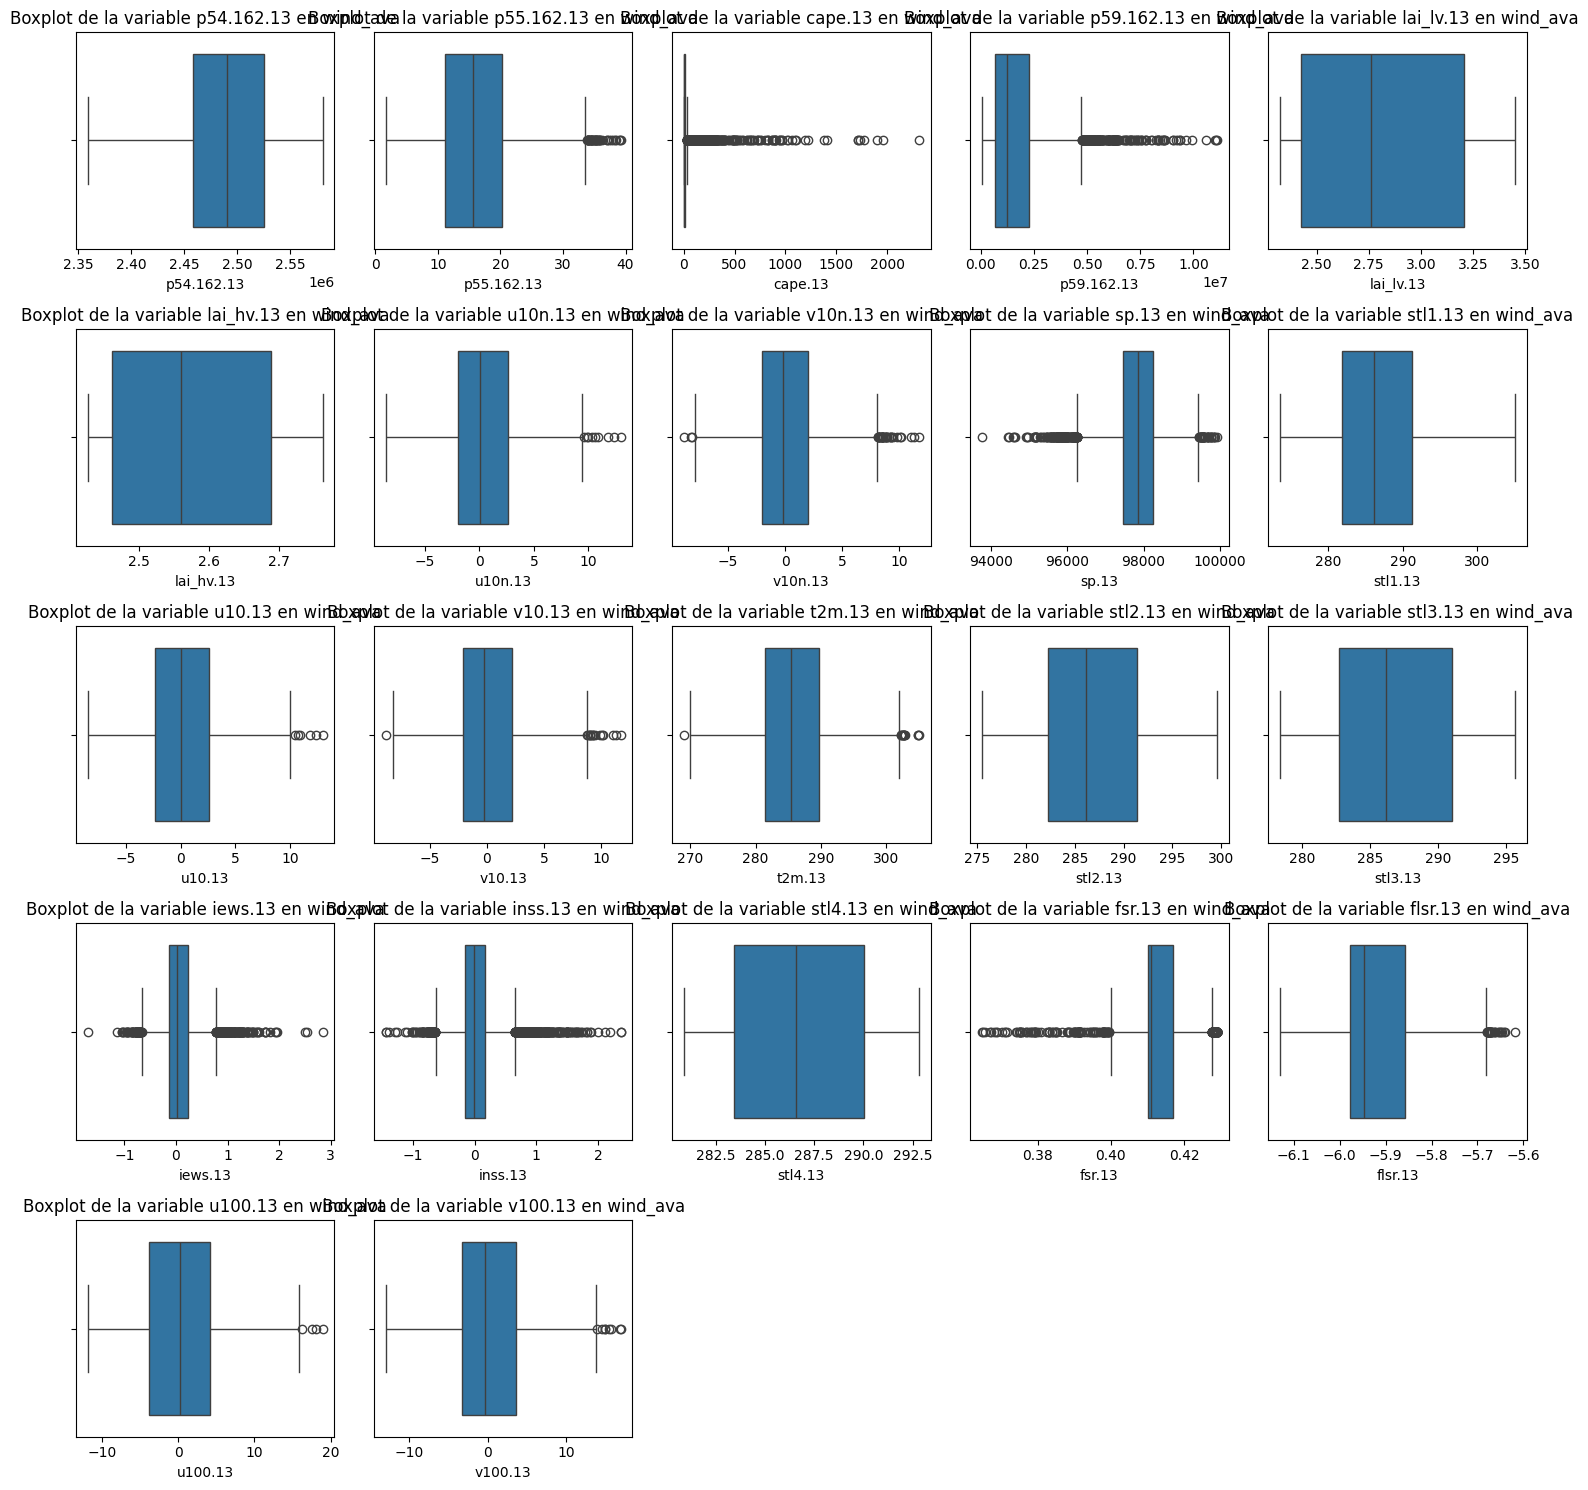

In [7]:
num_plots = len(wind_ava.columns)
num_rows = -(-num_plots // 5)  

fig, axs = plt.subplots(num_rows, 5, figsize=(15, 3*num_rows))

axs = axs.flatten() # Aplanar el array de ejes para facilitar el acceso

for i, column in enumerate(wind_ava.columns):
    sns.boxplot(x=wind_ava[column], ax=axs[i])
    axs[i].set_title(f"Boxplot de la variable {column} en wind_ava")

# Ocultar ejes sobrantes
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


Creacion de un dataset SIN valores atipicos (vamos a no sobreescribir el otro para poder comparar)

In [8]:
Q1 = wind_ava.quantile(0.25)
Q3 = wind_ava.quantile(0.75)
IQR = Q3 - Q1

# Límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = (wind_ava < lower_bound) | (wind_ava > upper_bound)

# Tratar los valores atípicos eliminándolos del conjunto de datos
wind_ava_no_outliers = wind_ava[~outliers.any(axis=1)]

### Analisis univariado

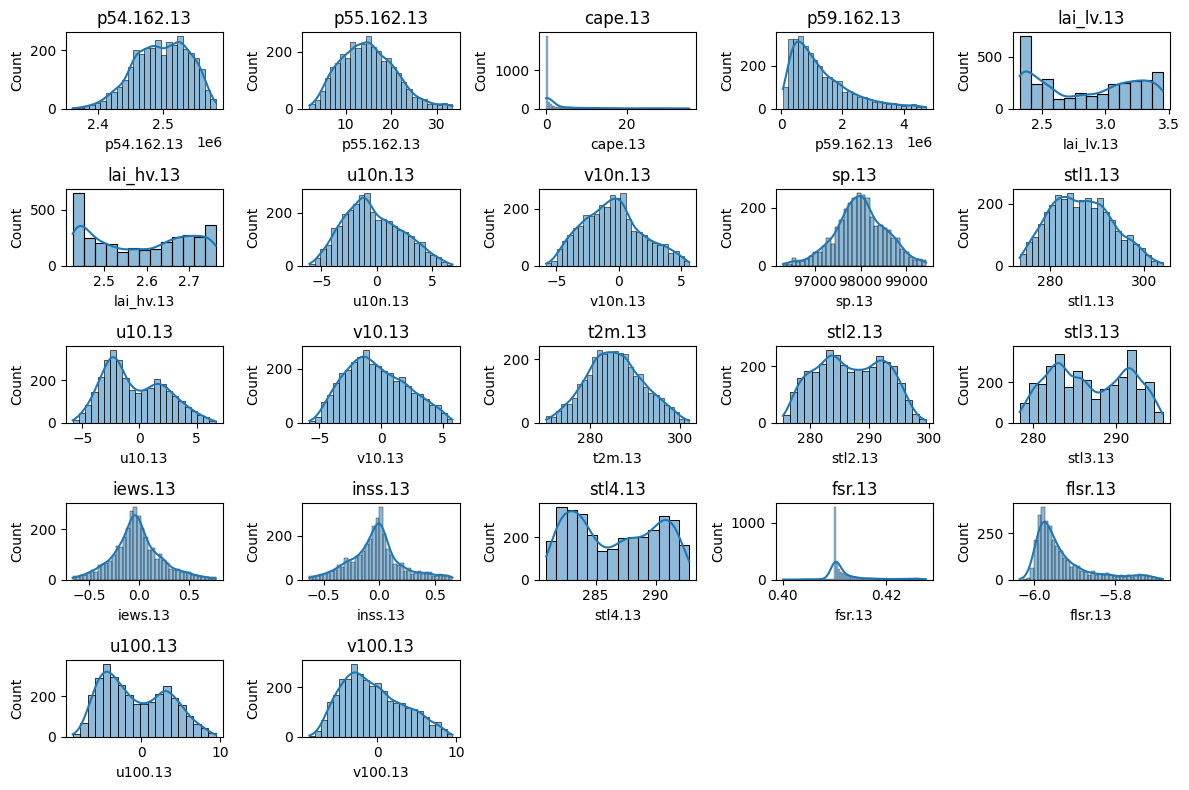

In [9]:
# Histogramas para cada variable
''' # Descomentar para ver los histogramas de las variables con outliers, son muy similares a los de las variables sin outliers.
plt.figure(figsize=(12, 8))
for i, column in enumerate(wind_ava.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(wind_ava[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()
'''
plt.figure(figsize=(12, 8))
for i, column in enumerate(wind_ava_no_outliers.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(wind_ava_no_outliers[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


Lo mas relevante de estas graficas son, tanto los picos en 0 en cape y en fsr, que como tambien veremos mas adelante estan muy relacionados.
El hecho de que la distribucion de los valores de cape sea asi tambien hace pensar que podemos tener problemas en el futuro, ya que el modelo puede  predecir siempre cape=0 con una precision bastante alta.

### Analisis multivariado

#### Matrices de correalcion

Correlacion general

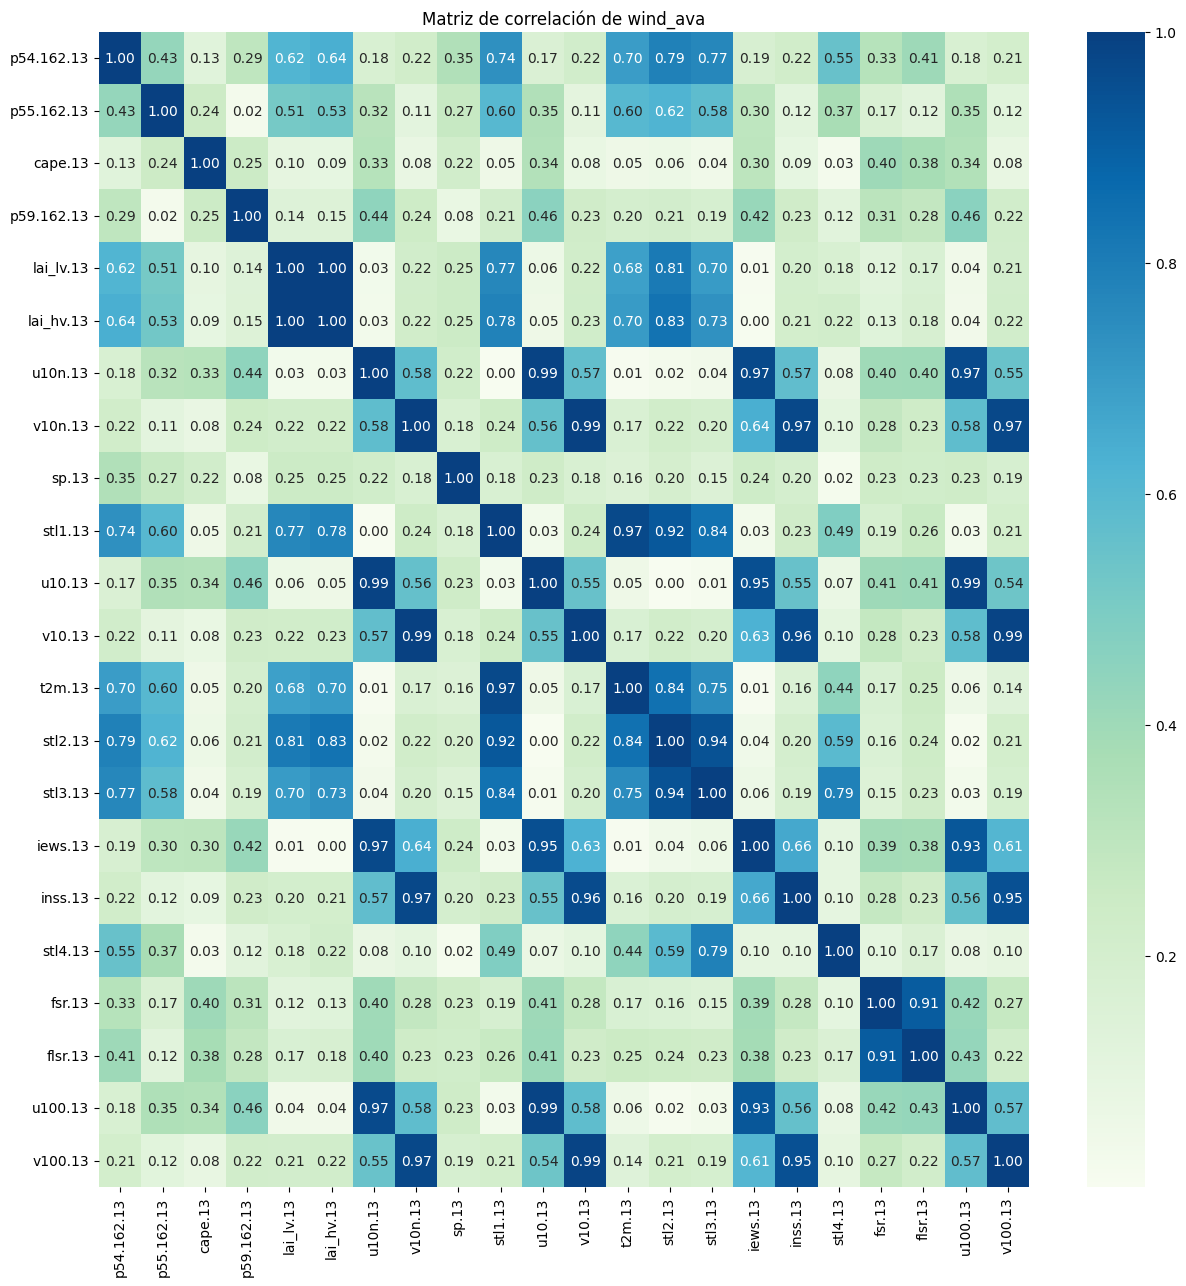

In [10]:
# correlacion entre las variables 
correlation = wind_ava_no_outliers.corr()
# poner correlaciones en valor absoluto
correlation = correlation.abs()
# mostrar la matriz de correlacion
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, cmap="GnBu", fmt=".2f")
plt.title("Matriz de correlación de wind_ava")
plt.show()

Correlacion con la variable cape.13

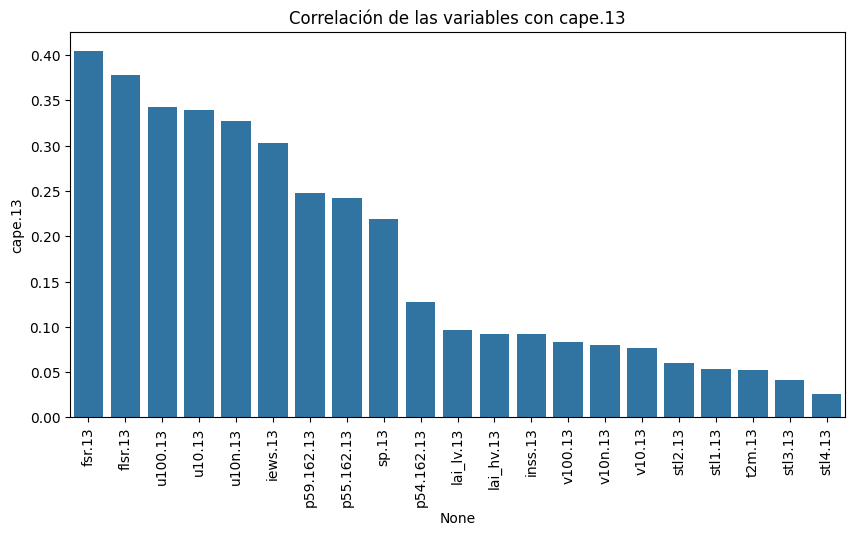

In [11]:
correlation_cape13 = abs(correlation['cape.13']).sort_values(ascending=False)[1:]
# plot de las correlaciones
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_cape13.index, y=correlation_cape13)
plt.title("Correlación de las variables con cape.13")
plt.xticks(rotation=90)
plt.show()

Correlacion de cada variable con las demas (util para saber que variables pueden ser combinadas o eliminadas ya que aportan la misma información)

In [12]:
import pprint as pp

# Para cada columna, encuentra las variables más correlacionadas
correlation_dict = {}
n = 2 # encontrar las n variables más correlacionadas, establecer n>23 para ver todas las variables
for col in correlation.columns:
    correlation_dict[col] = correlation[col].sort_values(ascending=False)[1:n+1].to_dict()

pp.pprint(correlation_dict, compact=True)

{'cape.13': {'flsr.13': 0.3780469771667146, 'fsr.13': 0.40495790078895355},
 'flsr.13': {'fsr.13': 0.9128883885554596, 'u100.13': 0.427749641859225},
 'fsr.13': {'flsr.13': 0.9128883885554596, 'u100.13': 0.42145563960904053},
 'iews.13': {'u10.13': 0.9527886549645388, 'u10n.13': 0.9687684408035979},
 'inss.13': {'v10.13': 0.9615536910427601, 'v10n.13': 0.9731991449633753},
 'lai_hv.13': {'lai_lv.13': 0.9985228215009294, 'stl2.13': 0.8337561714487843},
 'lai_lv.13': {'lai_hv.13': 0.9985228215009294, 'stl2.13': 0.812510080657075},
 'p54.162.13': {'stl2.13': 0.787536108968121, 'stl3.13': 0.7672550835016847},
 'p55.162.13': {'stl1.13': 0.6003061067218377, 'stl2.13': 0.6201222558167909},
 'p59.162.13': {'u10.13': 0.4566610466782387, 'u100.13': 0.4608049077606317},
 'sp.13': {'p54.162.13': 0.34644828033760044,
           'p55.162.13': 0.26699519359423013},
 'stl1.13': {'stl2.13': 0.9225920646430583, 't2m.13': 0.9724882261617934},
 'stl2.13': {'stl1.13': 0.9225920646430583, 'stl3.13': 0.94451

Podemos ver que hay variables que estan muy altamente correlacionadas entre si, con correlaciones cercanas a 1, habra que decidir que hacer con estas variables ya que a priori no parecen muy utiles al aportar la misma información

## Sistemas de evaluación

### Evaluación Outer, seleccion de las medidas del Error

Como hemos podido observar en el EDA, los datos contienen una gran cantidad de datos atipicos, que podemos suponer que hay ruido en los datos, es por ello que vamos a descartar MSE como medida pues es muy probable que sobreestime el error.
Ademas los valores de cape.13 van desde 0 en la mayoria de casos a varios miles en otros, lo cual tambien es un problema con el MSE, por lo que podriamos plantearnos emplear MPSE, aun asi debido a los valores atipicos esta medida tampoco nos parece la ideal. 
Lo mismo ocurre aun que en menor medida con RMSE Y RMSPE.
Una medida que poriamos plantearnos usar es MAPE o MAE para solucionar este problema con los valores atipicos, pero nos introduce de nuevo conflicto con el gran rango de valores que toma cape.13.

Teniendo esto en cuenta consideramos que las mejores medidas del error para este caso son:
- R2
- RMSE
- MAE (para tener una medida no basada en el MSE)

#### Creación de un modelo dummy

Basandonos en las medidas seleccionadas anteriormente vamos a crear un regresor dummy y evaluarlo.

In [13]:

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Primero, dividiremos los datos en entrenamiento y test
X = wind_ava_no_outliers.drop(columns='cape.13')
y = wind_ava_no_outliers['cape.13']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Entrenar un modelo de regresión "dummy" que prediga la media
# Este modelo es útil como referencia para comparar con otros modelos en el futuro
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

def rmse(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))

dummy_rmse = rmse(y_test, dummy.predict(X_test))
dummy_r2 = metrics.r2_score(y_test, dummy.predict(X_test))
dummy_mae = metrics.mean_absolute_error(y_test, dummy.predict(X_test))

print(f"RMSE del modelo dummy: {dummy_rmse:.2f}")
print(f"R^2 del modelo dummy: {dummy_r2:.2f}")
print(f"MAE del modelo dummy: {dummy_mae:.2f}")

RMSE del modelo dummy: 6.67
R^2 del modelo dummy: -0.01
MAE del modelo dummy: 4.73


Como se puede observar, haciendo uso de dos modelos de regresión "dummy" se tiene a un error cuadrático medio elevado.
Este modelo lo usaremos para comparar con nuestro modelo real

### Comparación de Alternativas y Ajuste de Hiperparámetros

Para realizar el ajuste de hiperparametros primero vamos a realizar una Grid-Search basandonos el la metrica de RMSE.

In [14]:
# vamos a liberar memoria por que mi portatil va a explotar
del axs, col, column, correlation, correlation_cape13, correlation_dict, fig, i, IQR
del j, lower_bound, n, num_plots, num_rows, outliers, Q1, Q3, upper_bound, wind_comp
# dejamos solo SEED, wind_ava, wind_ava_no_outliers

#### Ajuste de hiperparámetros
para una regresión, se van a eliminar las columnas que esten altamente correlacionadas con entre si, ya que aportan la misma información y pueden causar problemas en el modelo.

In [15]:
# adjust hyperparameters for a regression model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler

X = wind_ava.drop(columns='cape.13')
y = wind_ava['cape.13']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=SEED)
 
def drop_correlated_cols(data, threshold=0.9):
    correlation = data.corr().abs()
    upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"eliminadas {len(to_drop)} columnas por alta correlación.")
    return data.drop(columns=to_drop)

# Convertir la función en un transformador
drop_correlated = FunctionTransformer(drop_correlated_cols)

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('drop_correlated', drop_correlated, X.columns),
        ('scale', StandardScaler(), X.columns)
    ]
)



In [19]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression
from sklearn.pipeline import Pipeline



elastic_pipe_regr = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', ElasticNetCV(
        l1_ratio        = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
        alphas          = np.logspace(-10, 3, 200),
        cv              = 5,
        max_iter=1000,
    ))
])

np.random.seed(SEED)

In [20]:
# vamos a entrenar con todos los datos y luego sin los outliers
X = wind_ava.drop(columns='cape.13')
y = wind_ava['cape.13']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=SEED)

eliminadas 10 columnas por alta correlación.


c:\Users\defal\Documents\Aprendizaje-automatico\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1815404.3943862543, tolerance: 4398.889511531705
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\defal\Documents\Aprendizaje-automatico\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14501830.381968087, tolerance: 4398.889511531705
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\defal\Documents\Aprendizaje-automatico\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18335453.685487404, tolerance: 4398.889511531705
  model = cd_fast.enet_coordinate_descent_gram(
c:\U

c:\Users\defal\Documents\Aprendizaje-automatico\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19057153.254764773, tolerance: 4398.889511531705
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\defal\Documents\Aprendizaje-automatico\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19057151.449148957, tolerance: 4398.889511531705
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\defal\Documents\Aprendizaje-automatico\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19057151.769001704, tolerance: 4398.889511531705
  model = cd_fast.enet_coordinate_descent_gram(
c:\U

eliminadas 10 columnas por alta correlación.
RMSE de regresión lineal - Elastic Net: 88.301 $/hora
mejor alpha: 0.009329304026284695
mejor l1_ratio: 0.9
eliminadas 10 columnas por alta correlación.


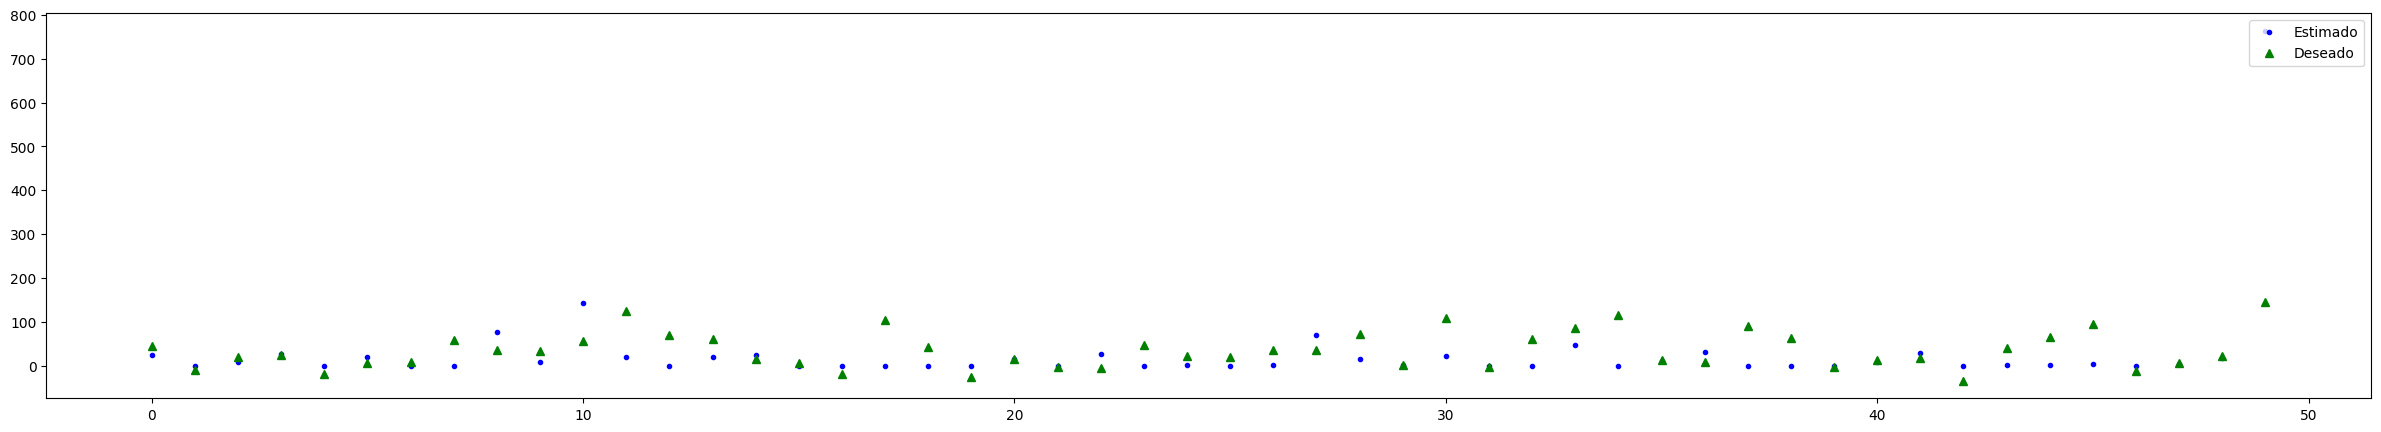

In [21]:
elastic_pipe_regr.fit(X_train, y_train)

def pintaResultados (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test[:n].size)
  pred = reg.predict(X=X_test)
  plt.plot(x, y_test[:n], 'b.', label='Estimado')
  plt.plot(x, pred[:n], 'g^', label='Deseado')
  plt.legend(loc='upper right')
  plt.show()

print(f"RMSE de regresión lineal - Elastic Net: {rmse(y_test, elastic_pipe_regr.predict(X=X_test)):.3f} $/hora")
print(f"mejor alpha: {elastic_pipe_regr.named_steps['regressor'].alpha_}")
print(f"mejor l1_ratio: {elastic_pipe_regr.named_steps['regressor'].l1_ratio_}")

pintaResultados(elastic_pipe_regr, 50)

Modelo polinomico

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

degrees = [1, 2, 3, 4]
best_degree = 0
best_score = float('-inf')

for degree in degrees:
    poly_features = Pipeline([
        ('preproceso', preprocessor),
        ('regresor', PolynomialFeatures(degree = degree, include_bias=False))
    ])
    X_train_poly = poly_features.fit_transform(X_train)
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(X_train_poly, y_train)
    scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=5)
    print(f"Procesado {degree} con mejor valor R2: {max(scores)}")
    if(max(scores) > best_score):
        best_score = max(scores)
        best_degree = degree   
    

eliminadas 10 columnas por alta correlación.
Procesado 1 con mejor valor R2: 0.1425289437711772
eliminadas 10 columnas por alta correlación.
Procesado 2 con mejor valor R2: 0.33881871358292104
eliminadas 10 columnas por alta correlación.
Procesado 3 con mejor valor R2: 0.335270499109374
eliminadas 10 columnas por alta correlación.
Procesado 4 con mejor valor R2: 0.18965974274198594


In [33]:
poly_features = Pipeline([
   ('preproceso', preprocessor),
   ('regresor', PolynomialFeatures(degree = best_degree))
])
X_train_poly = poly_features.fit_transform(X_train)
best_polynomial_regressor = LinearRegression()
best_polynomial_regressor.fit(X_train_poly, y_train)
X_test_poly = poly_features.fit_transform(X_test)
print(f"Resumen del regresor: {best_polynomial_regressor.coef_.compress(best_polynomial_regressor.coef_ != 0).size} coeficientes no nulos de {best_polynomial_regressor.coef_.size} posibles")
print(f"RMSE de regresión polinómica: {rmse(y_test, best_polynomial_regressor.predict(X=X_test_poly))}")
print(f"Mejor grado polinómico: {best_degree}")


eliminadas 10 columnas por alta correlación.
eliminadas 10 columnas por alta correlación.
Resumen del regresor: 561 coeficientes no nulos de 561 posibles
RMSE de regresión polinómica: 25704.14501905286
Mejor grado polinómico: 2


#fixme: WTF por que el dummy tiene un rmse de 6 y este tiene un rmse de 25k !?!?!?

VAmos a probar a ver si sin eliminar variables y con un modelo polinomico podemos mejorar el modelo #FIXME: elegir uno :D

In [38]:
# modelo sin eliminar variables correlacionadas en el preprocesado
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

degrees = [1, 2, 3, 4]
best_degree = 0
best_score = float('-inf')

preprocessor_2 = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), X.columns)
    ]
)

for degree in degrees:
    poly_features = Pipeline([
        ('preproceso', preprocessor_2),
        ('regresor', PolynomialFeatures(degree = degree, include_bias=False))
    ])
    X_train_poly = poly_features.fit_transform(X_train)
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(X_train_poly, y_train)
    scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=5)
    print(f"Procesado {degree} con mejor valor R2: {max(scores)}")
    if(max(scores) > best_score):
        best_score = max(scores)
        best_degree = degree
        

Procesado 1 con mejor valor R2: 0.14252894377129632
Procesado 2 con mejor valor R2: 0.35927548693660427
Procesado 3 con mejor valor R2: -4.443650781300385
Procesado 4 con mejor valor R2: -7.780999028997593


In [39]:
poly_features = Pipeline([
    ('preproceso', preprocessor_2),
    ('regresor', PolynomialFeatures(degree = best_degree))
    ])

X_train_poly = poly_features.fit_transform(X_train)
best_polynomial_regressor = LinearRegression()
best_polynomial_regressor.fit(X_train_poly, y_train)
X_test_poly = poly_features.fit_transform(X_test)
print(f"Resumen del regresor: {best_polynomial_regressor.coef_.compress(best_polynomial_regressor.coef_ != 0).size} coeficientes no nulos de {best_polynomial_regressor.coef_.size} posibles")
print(f"RMSE de regresión polinómica sin eliminar variables correlacionadas: {rmse(y_test, best_polynomial_regressor.predict(X=X_test_poly))}")
print(f"Mejor grado polinómico: {best_degree}")

Resumen del regresor: 253 coeficientes no nulos de 253 posibles
RMSE de regresión polinómica sin eliminar variables correlacionadas: 83.11737594572288
Mejor grado polinómico: 2


Este tiene un rmse mas razonable pero sigue siendo peor que el dummy :c